<a href="https://colab.research.google.com/github/cdsouza2701/cdsouza2701/blob/main/Predicting_Churn_with_Machine_Learning_Model_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Libraries**

In [1]:
#Import Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#**Load dataset**
Data set from: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

In [3]:
#Load dataset
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [47]:
#Load the data into a data frame
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
#Show the numbere of rows and columns
df.shape

(7043, 21)

In [46]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [6]:
#Show all of the columns
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [48]:
for col in df.columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Value counts for column: customerID
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
------------------------------
Value counts for column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
------------------------------
Value counts for column: SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
------------------------------
Value counts for column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
------------------------------
Value counts for column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
------------------------------
Value counts for column: tenure
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
-------------

#**Checking for NA values**

In [8]:
#Check for missing data or NA values
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
#Show some stats
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#**Finding Count of Churn**

In [10]:
#Show count of churn and no churn
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


<Axes: xlabel='Churn', ylabel='count'>

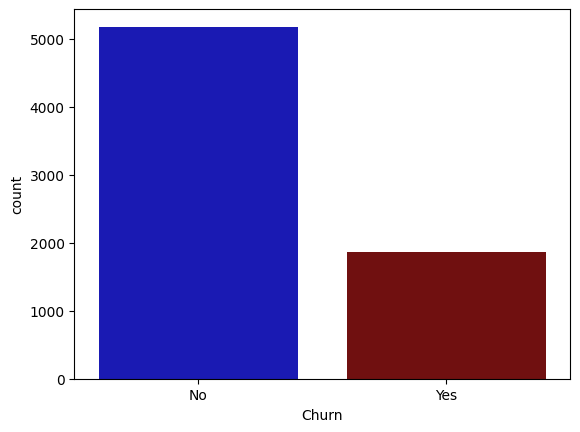

In [22]:
#Visualize count of cust churn. hue determines what variable is used for coloring, and palette determines which colors are used for each category of that variable.
sns.countplot(x='Churn', data=df, hue = 'Churn', palette={'Yes': 'maroon', 'No': 'mediumblue'})

##**Baseline Percentage of Churn predictor from dataset**

In [24]:
#What % of cust are leaving?
num_retained = df[df.Churn == 'No'].shape[0]
num_churned = df[df.Churn == 'Yes'].shape[0]

#Print % of cust stayed
print(num_retained / (num_retained + num_churned) * 100, '% of customers stayed with the company.')

#Print % of cust left#
print(num_churned / (num_retained + num_churned) * 100, '% of customers left the company.')

#Good to know because:
  #if you picked at random a customer from the dataset, and make a guess if customer churned or didnt; its 50-50 chance.
  #Using this dataset, we have around a 73.5% chance that the customer is one that would stay, and a 26.5% chance to be a leaving customer.
    #This is baseline of our prediction, without the model used yet.
  #We want the ML prediction model to have a higher prediction rate than 73.5%, to be tagged useful.

73.4630129206304 % of customers stayed with the company.
26.536987079369588 % of customers left the company.


##**Churn count based off Gender**

<Axes: xlabel='gender', ylabel='count'>

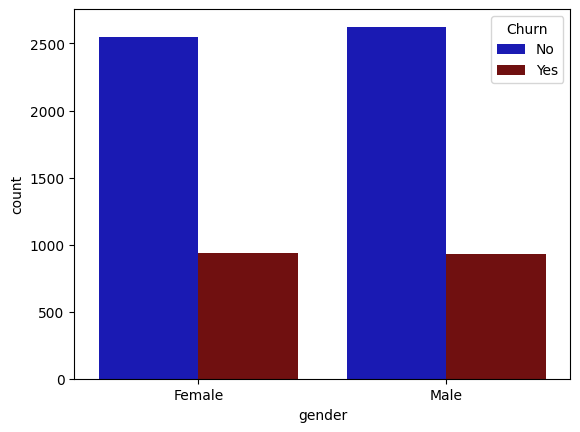

In [26]:
#Visualize churn count based on Gender
sns.countplot(x='gender', data=df, hue='Churn', palette={'Yes': 'maroon', 'No': 'mediumblue'})

#No significant variance of churn based off gender.
#Result: Gender doesnt influence why customers are churning.

##**Churn count based off internet service use.**


<Axes: xlabel='InternetService', ylabel='count'>

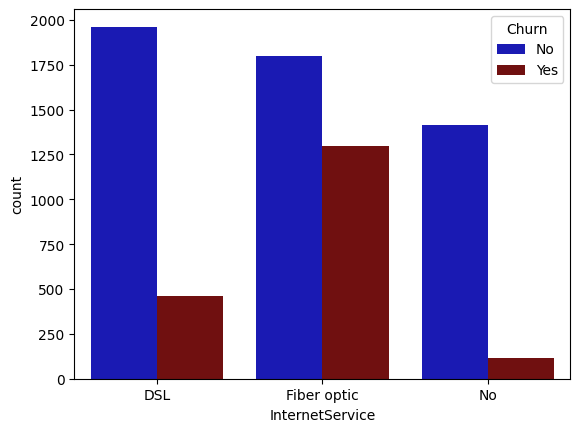

In [27]:
#Visualize churn count for internet service use.
sns.countplot(x='InternetService', data=df, hue='Churn', palette={'Yes': 'maroon', 'No': 'mediumblue'})

#There is significant variance of churn based off internet service.
#Result:
  #Fiber Optic has the highest churn rate. Customers with it have high chance of churning.
  #DSL customers dont churn as much.

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>], dtype=object)

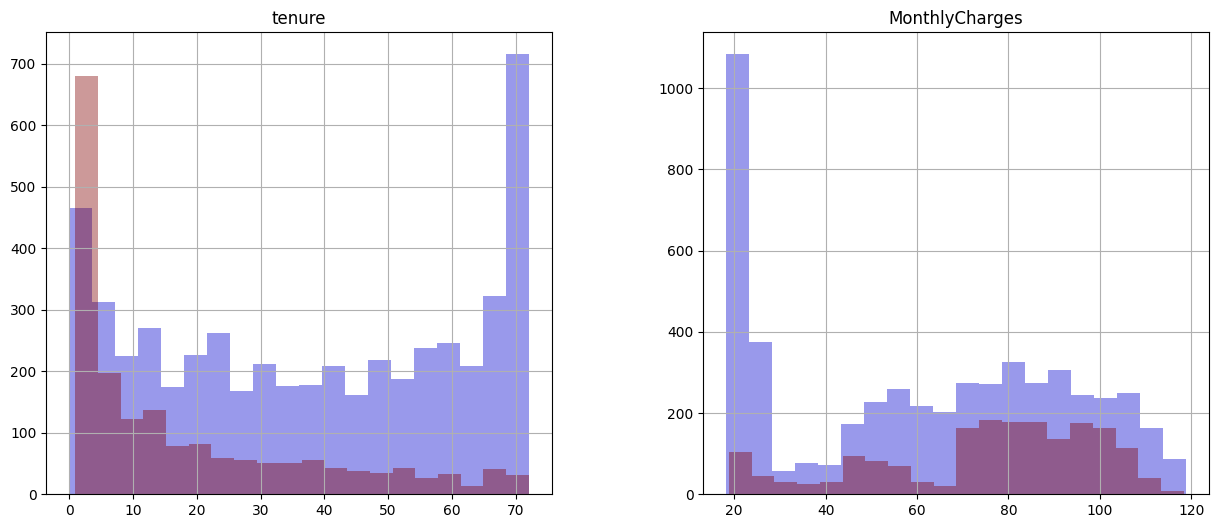

In [38]:
numerical_features = ['tenure', 'MonthlyCharges']
fig, ax, = plt.subplots(1, 2, figsize = (15, 6))
df[df.Churn == 'No'][numerical_features].hist(bins=20, color='mediumblue', alpha=0.4, ax=ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color='maroon', alpha=0.4, ax=ax)

#Results:
#In terms of tenure (How long the cust stayed with company):The longer the customer stays the less likely to churn. Highest churn in the first 10 months.
#In terms of Monthly Charges: Highest churn between 70 to 110 €.


In [40]:
#Remove unncessary cols. Ie cust id as it wont be necessary.
cleaned_df = df.drop('customerID', axis = 1)
cleaned_df.shape

(7043, 20)

In [43]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [41]:
# Convert all object-type (categorical) columns to numeric
for col in cleaned_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    cleaned_df[col] = le.fit_transform(cleaned_df[col])

In [42]:
cleaned_df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64


In [44]:
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [51]:
for col in df.columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Value counts for column: customerID
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
------------------------------
Value counts for column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
------------------------------
Value counts for column: SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
------------------------------
Value counts for column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
------------------------------
Value counts for column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
------------------------------
Value counts for column: tenure
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
-------------

In [50]:
for col in cleaned_df.columns:
    print(f"Value counts for column: {col}")
    print(cleaned_df[col].value_counts())
    print("-" * 30)

Value counts for column: gender
gender
1    3555
0    3488
Name: count, dtype: int64
------------------------------
Value counts for column: SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
------------------------------
Value counts for column: Partner
Partner
0    3641
1    3402
Name: count, dtype: int64
------------------------------
Value counts for column: Dependents
Dependents
0    4933
1    2110
Name: count, dtype: int64
------------------------------
Value counts for column: tenure
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
------------------------------
Value counts for column: PhoneService
PhoneService
1    6361
0     682
Name: count, dtype: int64
------------------------------
Value counts for column: MultipleLines
MultipleLines
0    3390
2    2971
1     682
Name: count, dtype: int64
------------------------------
Value counts for column: I

In [52]:
#Scaling the data
X = cleaned_df.drop('Churn', axis= 1) #Feature dataset
y = cleaned_df['Churn'] #Target dataset

X = StandardScaler().fit_transform(X)

In [53]:
#Split data into 80% train and 20% test
xtrain_df, xtest_df, ytrain_df, ytest_df = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
#Create model
model = LogisticRegression()
#Train model
model.fit(xtrain_df, ytrain_df)

LogisticRegression()

In [55]:
#Create the predictions on test data
predictions = model.predict(xtest_df)

#print the predictions
print(predictions)

[1 0 0 ... 0 0 1]


In [56]:
#Check the precision, recall, f1-score
print(classification_report(ytest_df, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

